<a href="https://colab.research.google.com/github/07Vishesh/07Vishesh/blob/main/Salary_calculate_by_experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
%matplotlib inline

In [9]:
df=pd.read_csv('salary_prediction_dataset.csv')
df.head()

YearsExperience        Salary
0         8.116262  41469.816295
1        19.063572  88641.137315
2        14.907885  76440.413727
3        12.374511  64925.484725
4         3.964354  22620.723082

YearsExperience    0
Salary             0
dtype: int64


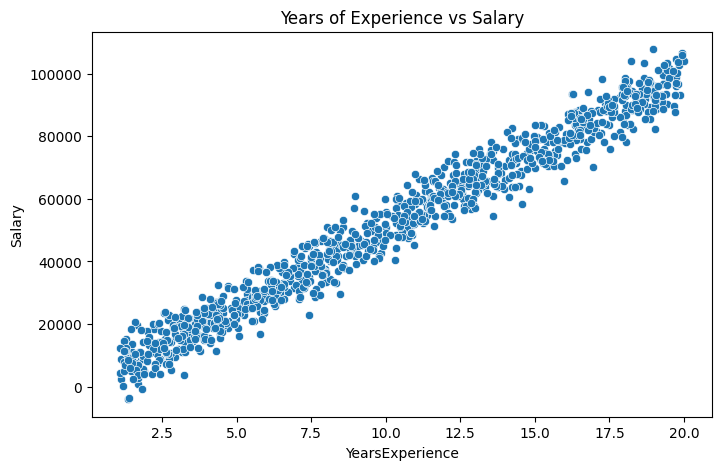

In [10]:
print(df.isnull().sum())
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

In [11]:
x=df[['YearsExperience']]
y=df['Salary']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 1), (200, 1), (800,), (200,))

In [12]:
model=LinearRegression()
model.fit(x_train,y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 995.5770464802481
Coefficient: 4953.709417260945


In [13]:
y_pred=model.predict(x_test)


results=pd.DataFrame({'Actual Salary':y_test.values,'Predicted':y_pred})
results.head()

Actual Salary     Predicted
0   46144.843128  41798.916309
1   85731.005173  82808.016799
2   55059.748116  49496.929481
3   42143.595304  39465.280850
4   88585.759395  95369.573814

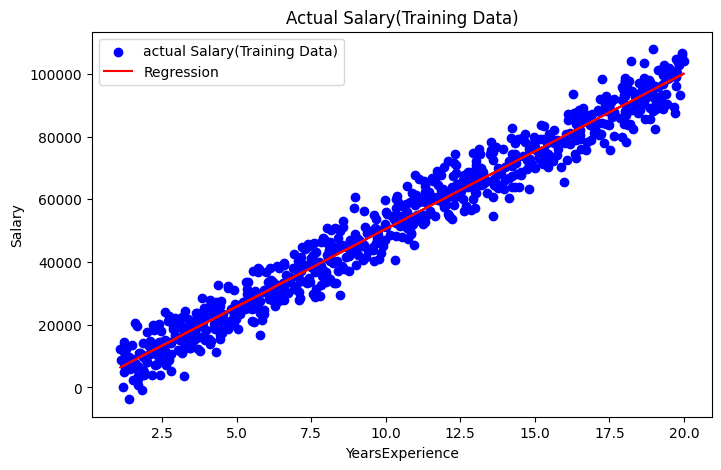

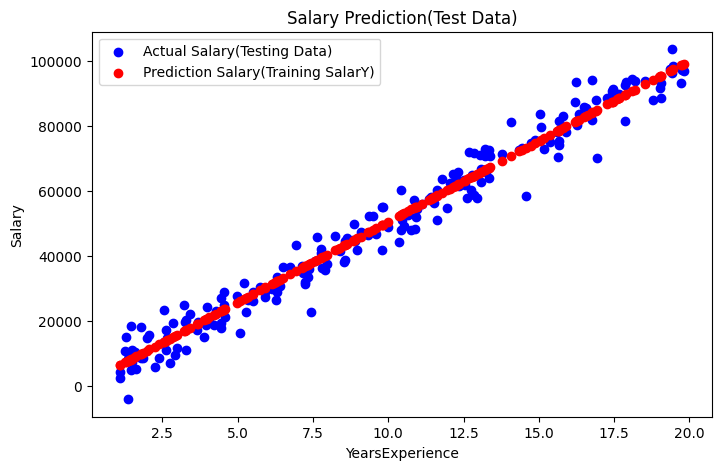

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(x_train,y_train,color='blue',label="actual Salary(Training Data)")
plt.plot(x_train,model.predict(x_train),color='red',label='Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Actual Salary(Training Data)')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(x_test,y_test,color='blue',label="Actual Salary(Testing Data)")
plt.scatter(x_test,y_pred,color='red',label='Prediction Salary(Training SalarY)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Salary Prediction(Test Data)')
plt.legend()
plt.show()



In [15]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 3602.3955438952066
Mean Squared Error: 21434311.66454385
R2 Score: 0.9720753738957405


In [22]:
experience=float(input('enter year of experience:'))
predicted_salary=model.predict([[experience]])
print(f"Predicted Salary for {experience} years of experience: {predicted_salary[0]}")

enter year of experience:50
Predicted Salary for 50.0 years of experience: 248681.0479095275


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
